Image Clustering
Description:
*******************************************************************

This is an individual assignment with maximum size of 1.

********************************************************************

Overview and Assignment Goals:

The objectives of this assignment are the following:
Implement the K-Means Algorithm
Deal with Image data (processed and stored in vector format)
Think about Best Metrics for Evaluating Clustering Solutions

Detailed Description:

* There are 2 leaderboard submissions and this is the main assignment. HW3 - Iris is the other associated assignment with an easier dataset where K-Means can be tested quickly. *

For this assignment, you are required to implement the K-Means algorithm. Please do not use libraries for this assignment except for pre-processing.
Input Data (provided as new_test.txt) consists of 10,000 images of handwritten digits (0-9). The images were scanned and scaled into 28x28 pixels. For every digit, each pixel can be represented as an integer in the range [0, 255] where 0 corresponds to the pixel being completely white, and 255 corresponds to the pixel being completely black. This gives us a 28x28 matrix of integers for each digit. We can then flatten each matrix into a 1x784 vector. No labels are provided.
Format of the input data: Each row is a record (image), which contains 784 comma-delimited integers.
Examples of digit images can be found here
For Evaluation Purposes (Leaderboard Ranking), we will use the V-measure in the sci-kit learn library that is considered an external index metric to evaluate clustering. Essentially your task is to assign each of the instances in the input data to K clusters identified from 1 to K.

For the leaderboard evaluation set K to 10. Submit your best results. The leaderboard will report the V-measure on 50% of sampled dataset.
Some things to note:

The public leaderboard shows results for 50% of randomly chosen test instances only. This is a standard practice in data mining challenge to avoid gaming of the system.
In a 24-hour cycle you are allowed to submit a clustering solution 10 times only. Only one account per student is allowed.
The final ranking will be based on the last submission.
format.txt shows an example file containing 10,000 rows with random class assignments from 1 to 10.

Rules:
This is an individual assignment. Discussion of broad level strategies are allowed but any copying of submission files and source codes will result in honor code violation. Similarly, it's never acceptable to copy code from the internet, even if you cite the source. Doing so will result in honor code violation.
Feel free to use the programming language of your choice for this assignment.
While you can use libraries and templates for dealing with input data you should implement your own K-Means algorithm.
Deliverables:
Valid Submissions to the Miner Website
Gradescope Submission of Source Code and Report:
Create a folder called HW3_LastName.
Create a subfolder called src and put all the source code there.
Create a subfolder called Report and place a 3-Page, single-spaced report describing details regarding the steps you followed for developing the clustering solution for image data. Be sure to include the following in the report:
Name Registered on miner website.
Ranks & V scores for your submissions for HW3-Iris and HW3-Image (at the time of writing the report). You will be graded on the ranking for both datasets, but the Image data will most likely have more weight.
Implement your choice of internal evaluation metric and plot this metric on y-axis with value of K increasing from 2 to 20 in steps of 2 for the data.
Your Approach (Pseudocode, how you choose or deal with the initial centers, how many runs etc)
Use tables and/or graphs to report your results.
Describe any feature selection/reduction you used in this study.
To ensure correctness, also submit results of evaluation on standard iris dataset provided as part of HW3-iris.
Archive your parent folder (.zip or .tar.gz) and submit via Gradescope for HW3.
Grading:
Grading for the Assignment will be split on your implementation (40%), report (30%) and ranking results (30%).

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from math import sqrt, floor
from scipy.spatial.distance import sqeuclidean,minkowski,euclidean,correlation,cosine
from sklearn.manifold import TSNE,MDS
from sklearn.decomposition import PCA, TruncatedSVD,IncrementalPCA

In [5]:
def readTrainfile(filepath):
    read_data = pd.read_csv(filepath,header=None)
    return read_data

In [6]:
inputData =readTrainfile("image_new_test.txt")
inputData.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
inputData.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,...,10000.000000,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.179300,0.163600,0.052600,0.0006,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.674149,5.736072,2.420004,0.0600,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,156.000000,6.0000,0.0,0.0,0.0,0.0,0.0,0.0


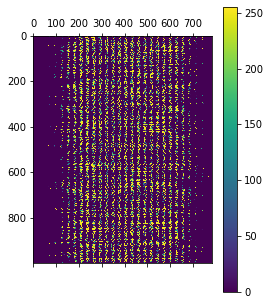

In [8]:
plt.matshow(inputData[:1000])
plt.colorbar()
plt.show()

<Figure size 432x288 with 0 Axes>

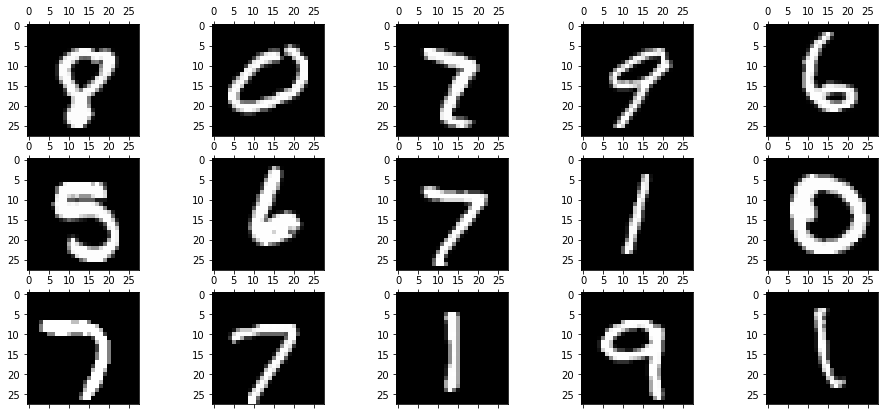

In [9]:
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1)
    ax.matshow(inputData.loc[i].values.reshape((28,28)).astype(float))
plt.show()

In [11]:
from sklearn.preprocessing import minmax_scale
#normalization
normalizedData = minmax_scale(inputData, feature_range=(0, 1))
normalizedData

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

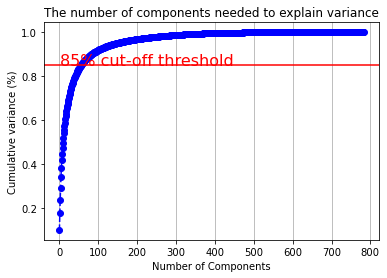

55.56634574335183

In [12]:
pca = PCA().fit(normalizedData)
fig, ax = plt.subplots()
xi = range(pca.n_components_)
intercept = np.interp(.85,pca.explained_variance_ratio_.cumsum(), xi)
y = np.cumsum(pca.explained_variance_ratio_)
#plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')
plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.5, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()
intercept


In [1]:
def initailzingCentroid(data, k):
    n = np.shape(data)[1]
    m = np.shape(data)[0]
    centroids = np.mat(np.zeros((k,n)))
    """
    dataCopy=data.copy()
    # add all the elements of each row and add as column and replace the original dataset and sort
    composite = np.mat(np.sum(dataCopy, axis=1))
    dataCopy = np.append(composite.T, dataCopy, axis=1)
    dataCopy.sort(axis=0)
    # Step value for dataset sharding
    step = floor(m/k)
    # k-1 equals the number of rows in the matrix (so that there are k matrix shards)
    #To derive means, add the columns of shards together; these columnar means are centroids.
    for j in range(k):
        if j == k-1:
            sums= np.sum(dataCopy[j*step:,1:], axis=0)
            centroids[j:] = (sums/step)
        else:
            sums= np.sum(dataCopy[j*step:(j+1)*step,1:], axis=0)
            centroids[j:] = (sums/step)
    """
    for j in range(k):
        centroids[j,:] = data[np.random.randint(np.shape(data)[0])]
    return centroids
def cluster_change(k,data,centroids,record,dist):
    minimum_distance = np.inf
    minimum_index = -1
    # Calculate distances using distance function passed 
    for clusterNo in range(k):
        distance = dist(centroids[clusterNo,:], data[record,:])
        if distance < minimum_distance:
            minimum_distance = distance
            minimum_index = clusterNo
    return minimum_distance,minimum_index

def update_centroid(k,clusters,data,centroids):
    # Update centroid location taking mean per cluster
    for value in range(k):
        idx = [i for i, n in enumerate(clusters) if n[0,0] == int(value)]
        centroids[value] = np.mean(data[idx], axis=0)
    return centroids
def calculate_SSE(clusters):
    sse = 0
    for i in range(len(clusters)):
        sse += clusters[i,1]
    return sse
def K_Means_Algo(data, k, no_of_records, centroids,dist,output):
    clusters = np.mat(np.zeros((no_of_records, 2)))
    flag = True
    no_of_iterations = 0
    #Setting flag to check if value has changed for the centroids
    while flag:
        flag = False
        # for each record in the dataset
        for record in range(no_of_records):
            minimum_distance,minimum_index=cluster_change(k,data,centroids,record,dist)
            # break if cluster assignment  have not changed
            if clusters[record, 0] != minimum_index: 
                flag = True
            #cluster Assignment 
            clusters[record, :] = minimum_index, pow(minimum_distance,2)
        centroids=update_centroid(k,clusters,data,centroids)
        no_of_iterations += 1
        if(output):
            print("\tCentroid :",no_of_iterations,"\t\n",centroids)
    return {"runs":no_of_iterations,'centroids' :centroids, 'clusters':np.squeeze(np.asarray(clusters[:,0])).astype(np.int64) + 1, 'sse':calculate_SSE(clusters)} 
    
def evaluate_k_means(data,k,plot,dist,output,graphtitle):
    if(output):
        print(graphtitle)
    no_of_records = np.shape(data)[0]
    centroids=initailzingCentroid(data, k)
    initial_centroid=centroids.copy()
    results= K_Means_Algo(data, k, no_of_records, centroids,dist,output)
    centroids=np.asarray(results['centroids'])
    clusters=results['clusters']
    SSE=results['sse']
    runs=results['runs']
    initial_centroid=np.asarray(initial_centroid)
    if(plot):
        fig = plt.figure(figsize = (15,15))
        #ax = fig.add_subplot(111, projection='3d')
        x_axis=data.copy()
        plt.scatter(x_axis[clusters == 1,0], x_axis[clusters == 1,1], s = 100, c = 'b', label = '1')
        plt.scatter(x_axis[clusters == 2,0], x_axis[clusters == 2,1], s = 100, c = 'g', label = '2')
        plt.scatter(x_axis[clusters == 3,0], x_axis[clusters == 3,1], s = 100, c = 'r', label = '3')
        plt.scatter(x_axis[clusters == 4,0], x_axis[clusters == 4,1], s = 100, c = 'c', label = '4')
        plt.scatter(x_axis[clusters == 5,0], x_axis[clusters == 5,1], s = 100, c = 'm', label = '5')
        plt.scatter(x_axis[clusters == 6,0], x_axis[clusters == 6,1], s = 100, c = 'y', label = '6')
        plt.scatter(x_axis[clusters == 7,0], x_axis[clusters == 7,1], s = 100, c = 'brown', label = '7')
        plt.scatter(x_axis[clusters == 8,0], x_axis[clusters == 8,1], s = 100, c = 'pink', label = '8')
        plt.scatter(x_axis[clusters == 9,0], x_axis[clusters == 9,1], s = 100, c = 'grey', label = '9')
        plt.scatter(x_axis[clusters == 10,0], x_axis[clusters == 10,1], s = 100, c = 'olive', label = '10')
        plt.scatter(centroids[:, 0], centroids[:,1], s = 110, c = 'k', label = 'Centroids', alpha=0.8, marker="X")
        plt.scatter(initial_centroid[:, 0], initial_centroid[:,1], s = 110, c = 'purple', label = 'Initial Centroid',alpha=0.8, marker="X")
        plt.title(graphtitle)
        plt.legend()
    return {"SSE":SSE,"clusters":clusters,"centroids":centroids,"initial_centroid":initial_centroid,"runs":runs}

In [15]:
testDataPCA = PCA(n_components=55).fit_transform(normalizedData)
testDataTSNE = TSNE(n_components=2).fit_transform(normalizedData)
testDataTruncatedSVD = TruncatedSVD(n_components=2).fit_transform(normalizedData)
testDataIncrementalPCA = IncrementalPCA(n_components=2).fit_transform(normalizedData)

In [ ]:
#sqeuclidean,minkowski,euclidean,correlation,cosine
result=dict()
result["TSNE"]= evaluate_k_means(testDataTSNE,10,True, euclidean, False,"TSNE")
result["PCA"]= evaluate_k_means(testDataPCA,10,True, euclidean,False,"PCA")
result["TruncatedSVD"]= evaluate_k_means(testDataTruncatedSVD,10,True, euclidean, False,"TruncatedSVD")
result["IncrementalPCA"]= evaluate_k_means(testDataIncrementalPCA,10,True, euclidean,False,"IncrementalPCA")


In [16]:
# Save the file the output file
def saveOutput(filePath, data):
    # writing to .txt
    np.savetxt(filePath, data, fmt='%s')

Dimensionality reduction using truncated SVD (aka LSA). -- 0.37
Principal component analysis (PCA)--0.39
Directly- 0.50


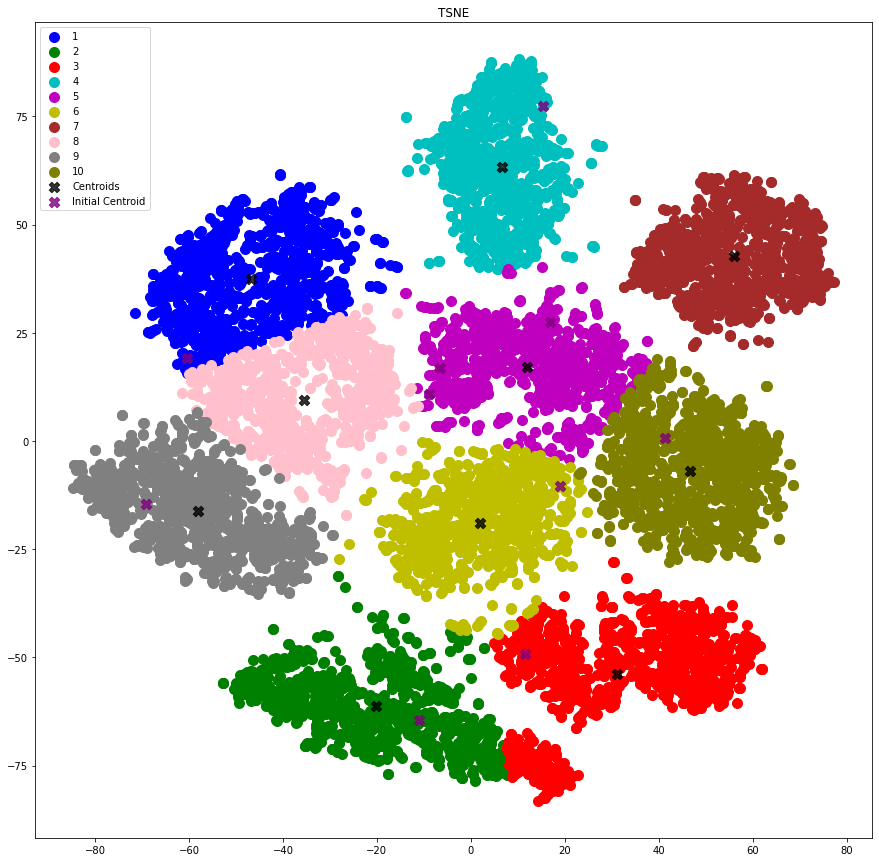

In [19]:
result=dict()
result["TSNE"]= evaluate_k_means(testDataTSNE,10,True, euclidean,False,"TSNE")


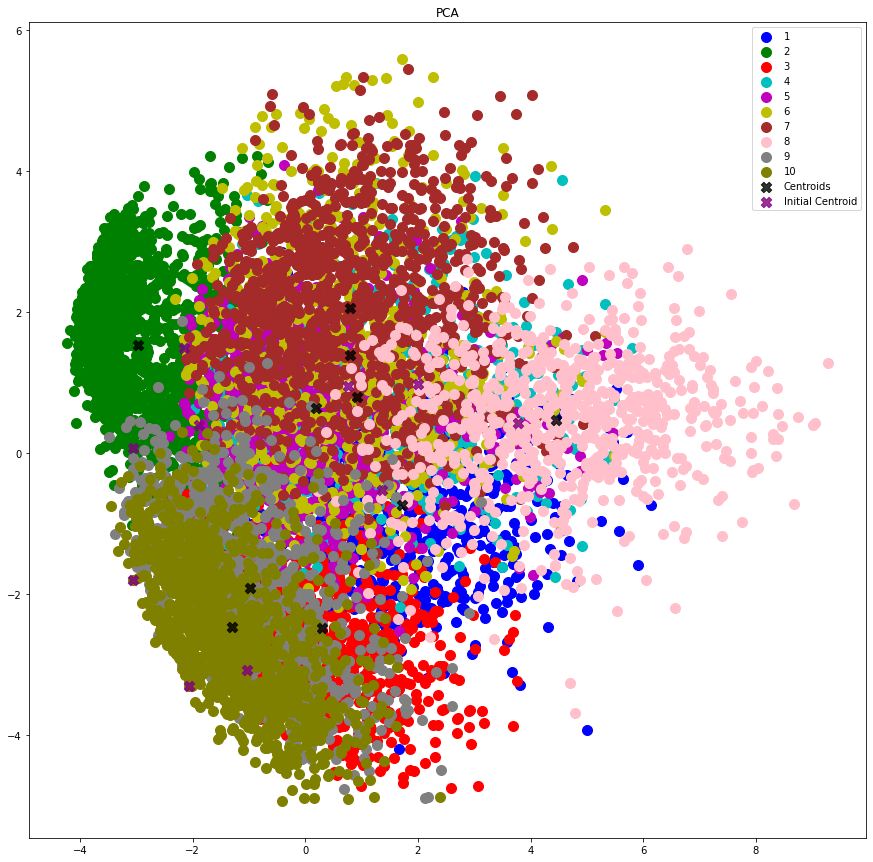

In [20]:
result["PCA"]= evaluate_k_means(testDataPCA,10,True, euclidean,False,"PCA")


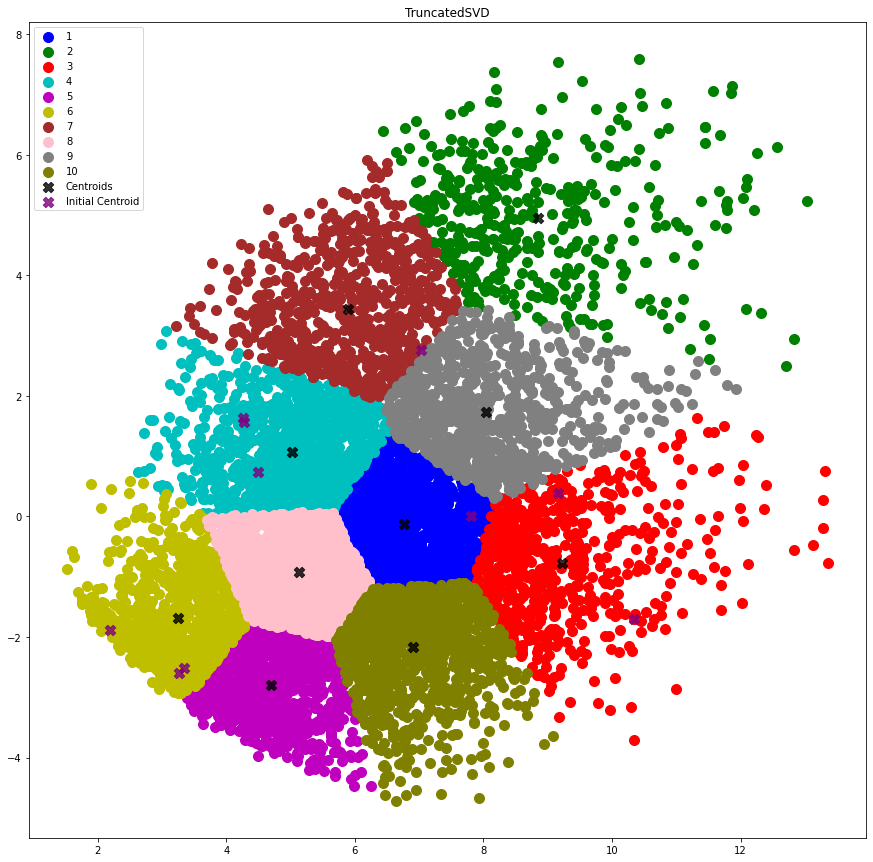

In [21]:
result["TruncatedSVD"]= evaluate_k_means(testDataTruncatedSVD,10,True, euclidean,False,"TruncatedSVD")


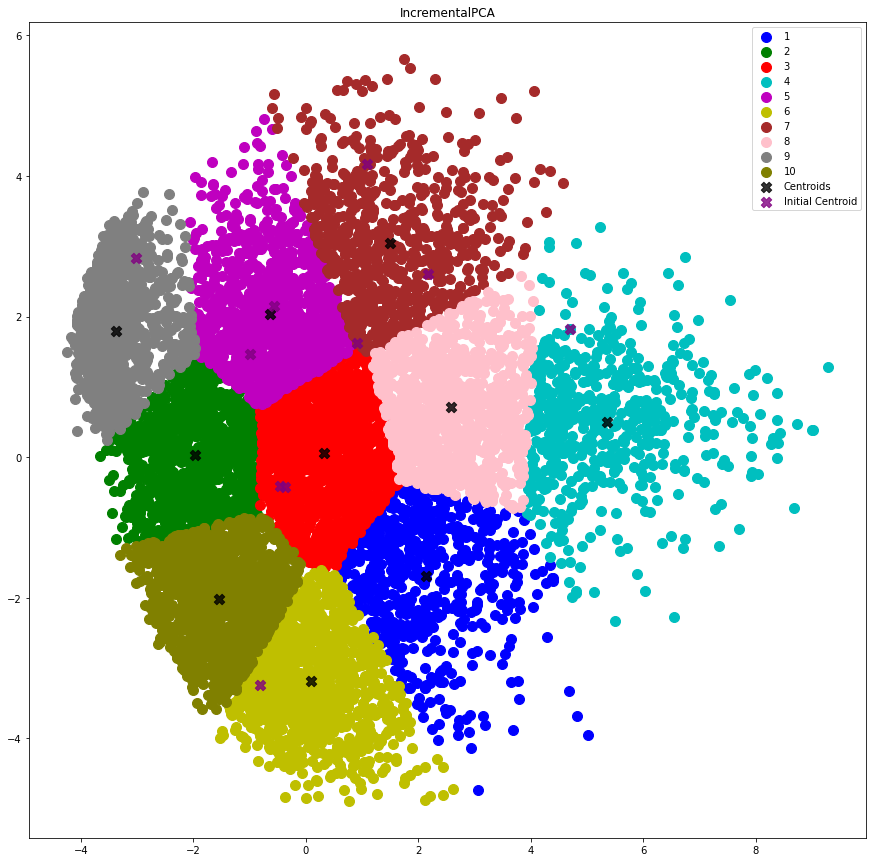

In [22]:
result["IncrementalPCA"]= evaluate_k_means(testDataIncrementalPCA,10,True, euclidean,False,"IncrementalPCA")


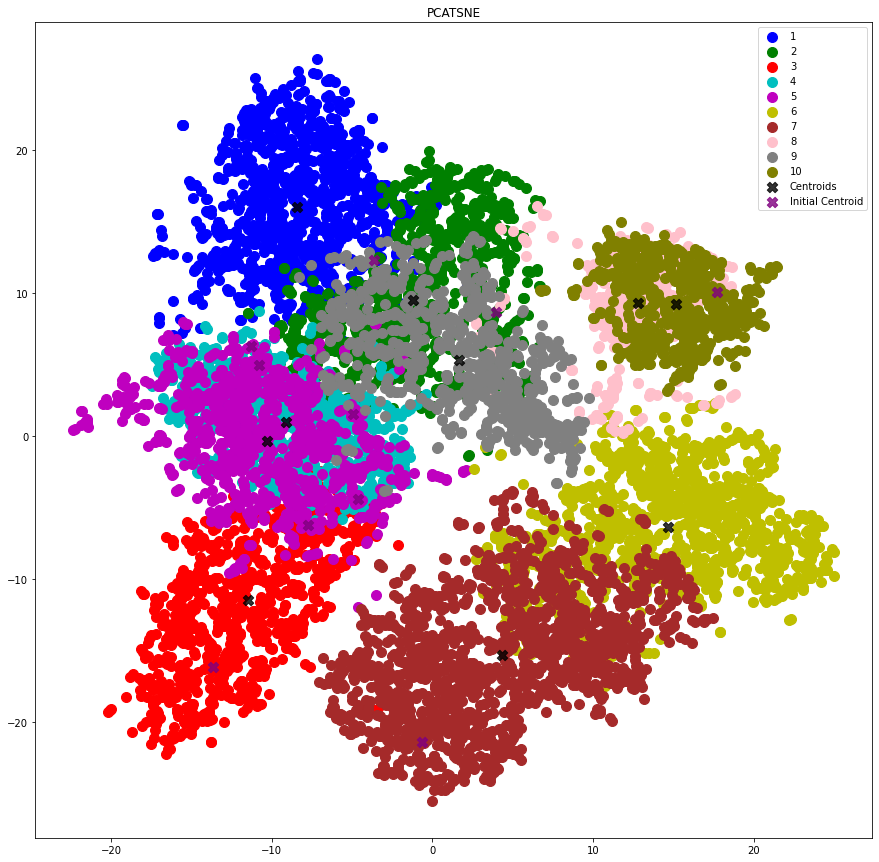

In [23]:
#Best performing metric: 
testDataPCA = PCA(n_components=55).fit_transform(normalizedData)
testDataPSATSNE = TSNE(n_components=3).fit_transform(testDataPCA)
result["PCATSNE"]= evaluate_k_means(testDataPSATSNE,10,True, euclidean,False,"PCATSNE")


In [24]:
saveOutput("TruncatedSVD.txt", result['TruncatedSVD']['clusters']) 

In [25]:
saveOutput("PCA.txt", result['PCA']['clusters']) #.37

In [26]:
saveOutput("TSNE.txt", result['TSNE']['clusters']) #.73

In [27]:
saveOutput("IncrementalPCA.txt", result['IncrementalPCA']['clusters']) #.37

In [29]:
saveOutput("PCATSNE.txt", result['PCATSNE']['clusters'])

k:  1 	 SSE: 7455665.170073603
k:  3 	 SSE: 1776526.425330999
k:  5 	 SSE: 1075036.289638338
k:  7 	 SSE: 803429.2891914733
k:  9 	 SSE: 636288.1521244504
k:  11 	 SSE: 520908.59446261387
k:  13 	 SSE: 440364.52745307056
k:  15 	 SSE: 383276.7577656572
k:  17 	 SSE: 372823.48769052915
k:  19 	 SSE: 330231.49525007495


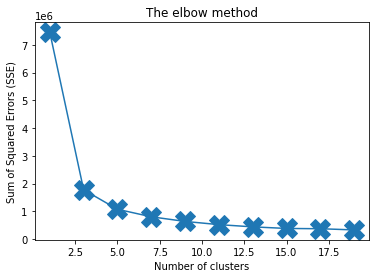

In [34]:
#Finding the optimum number of clusters for k-means classification
wcss = []
result=dict()
ran=range(1,21,2)
for k in ran:
    result[k] = evaluate_k_means(testDataPSATSNE, k, False, euclidean, False,"Testing")
    print("k: ",k,"\t SSE:",result[k]["SSE"])
    wcss.append(result[k]["SSE"])
plt.plot(ran, wcss, marker='X',markersize=20)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()  